In [1]:
import tensorflow as tf
from core.model import ModelMNIST10x10_base

class Implement(ModelMNIST10x10_base):
    def __init__(self, batch_size=128, opt=tf.train.MomentumOptimizer(0.1, 0.9, use_nesterov=True)):
        super(Implement, self).__init__(batch_size, opt)

    def compute_gradient(self, cost, var_refs):
        grads = tf.gradients(
                cost, var_refs,
                grad_ys=None, aggregation_method=None, colocate_gradients_with_ops=True)
        
        for l, g, v in zip(range(len(grads)), grads, var_refs):
            delta = g
            tf.summary.histogram('{}'.format(v.name.replace(':', '_')), v)
            tf.summary.histogram('{}/gradient'.format(v.name.replace(':', '_')), g)
            tf.summary.histogram('{}/delta'.format(v.name.replace(':', '_')), delta)
            
        return grads

In [2]:
import sys
import logging
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s', stream=sys.stdout)

model = Implement(batch_size=128)

[1204 12:21:24 @fs.py:89] WRN Env var $TENSORPACK_DATASET not set, using /root/tensorpack_data for datasets.
[1204 12:21:25 @prefetch.py:169] [PrefetchData] Will fork a dataflow more than one times. This assumes the datapoints are i.i.d.


In [3]:
from core.utils import loop

%env CUDA_VISIBLE_DEVICES=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.1
sess = tf.Session(config=config)
history = loop(sess, model, 30, './summary/5_1_first_order_optimization_batch_128')

env: CUDA_VISIBLE_DEVICES=0
[INFO] session initialized
[INFO] [0000] [train] cost:0.100 accuracy:0.842 elapsed:2.368sec [valid] cost:0.057 accuracy:0.919 elapsed:0.142sec
[INFO] [0001] [train] cost:0.051 accuracy:0.927 elapsed:1.564sec [valid] cost:0.045 accuracy:0.933 elapsed:0.126sec
[INFO] [0002] [train] cost:0.044 accuracy:0.935 elapsed:1.365sec [valid] cost:0.040 accuracy:0.942 elapsed:0.127sec
[INFO] [0003] [train] cost:0.039 accuracy:0.942 elapsed:1.353sec [valid] cost:0.036 accuracy:0.945 elapsed:0.131sec
[INFO] [0004] [train] cost:0.038 accuracy:0.945 elapsed:1.351sec [valid] cost:0.033 accuracy:0.951 elapsed:0.134sec
[INFO] [0005] [train] cost:0.036 accuracy:0.947 elapsed:1.341sec [valid] cost:0.033 accuracy:0.949 elapsed:0.132sec
[INFO] [0006] [train] cost:0.035 accuracy:0.948 elapsed:1.348sec [valid] cost:0.031 accuracy:0.954 elapsed:0.141sec
[INFO] [0007] [train] cost:0.034 accuracy:0.951 elapsed:1.347sec [valid] cost:0.031 accuracy:0.953 elapsed:0.135sec
[INFO] [0008] [tr

average elapsed time train:1.462536sec valid:0.131395sec


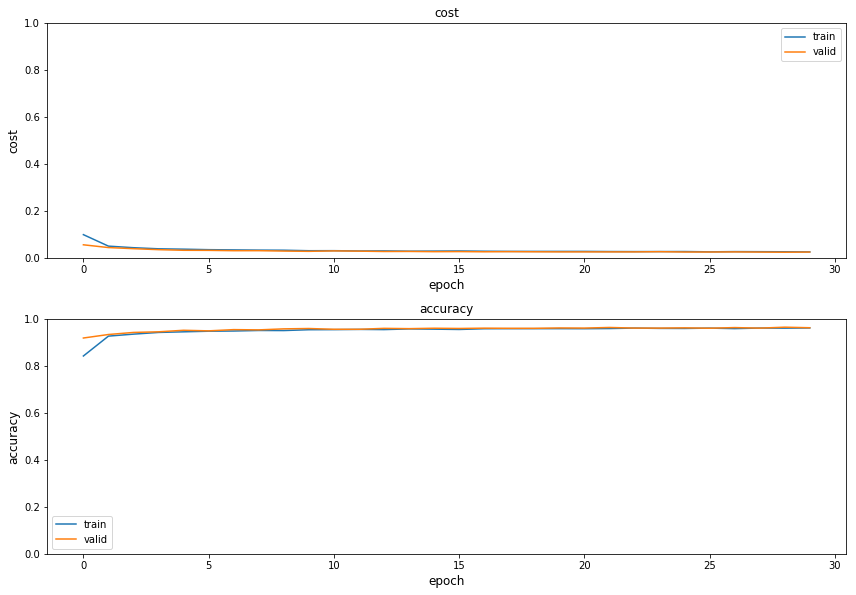

In [4]:
import matplotlib
%matplotlib inline

from core.utils import plot_jupyter
plot_jupyter(history)